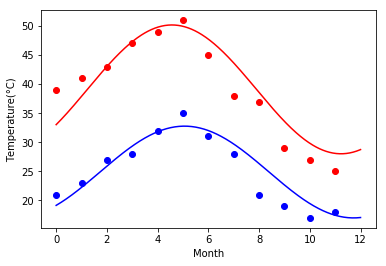

In [44]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import optimize

# Defining the temperatures as numpy arrays
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
# Getting the 12 months using arange() method to get it as an array
months = np.arange(0,12)

# yearly_temps method is used map the values for the year with respect to monthly sample of low and high temperatures
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

# Optimize.curve_fit () method is used for curve plotting which takes the yearly_temps function as an argument
# Hence the mapping will be times=months,avg=(40,-40),ampl=20,time_offset=0
res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])

# linspace () method gives equally distributed numbers within the given range so that we can get days for the year
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro')
# plot will be against the 365 days and the res_max will hold a list of three values whicg will be mapped to avg,ampl & time_offset
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
# alt + 0176 is used to get the degeree symbol
plt.ylabel('Temperature(°C)')

plt.show()

male      843
female    466
Name: sex, dtype: int64


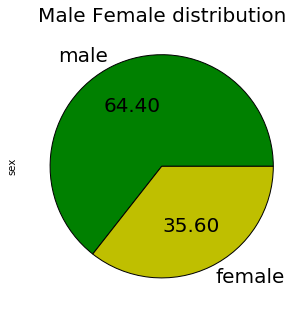

In [198]:
# Program to plot the male female distribution
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
df = pd.read_csv(url)
# in-built function used to get the male,female counts
male_female = df.sex.value_counts()
print(male_female)
# Setting the caption for the plot
plt.title('Male Female distribution',fontsize=20)
# Pie chart plotting with autopct to get the percentage proportion and figsize() method to define the figure size
male_female.plot.pie(colors=['g','y'],fontsize=20,autopct='%.2f',figsize=(5,5))
plt.show()

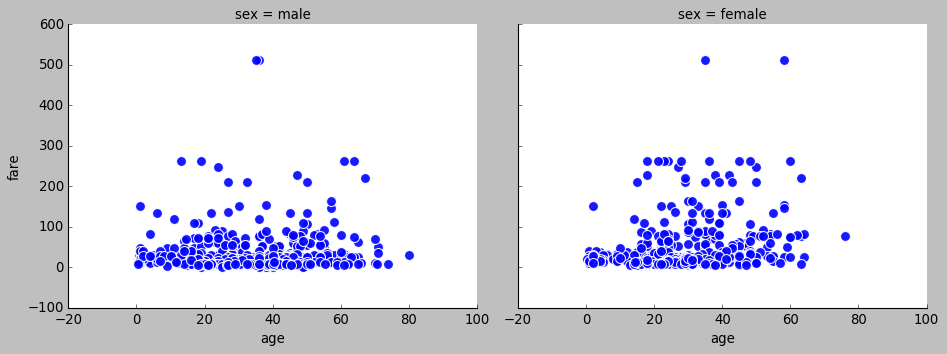

In [220]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
plt.style.use('classic')

# Dropping the NaN values as a data cleanup activity and to plot properly
titanic_df_clean_sex = df.dropna(subset=['sex'])

# Using seaborn's facetgrid style to get a grid with color order as male and female (Template formation)
base_plot = sns.FacetGrid(titanic_df_clean_sex[titanic_df_clean_sex['sex']==titanic_df_clean_sex['sex']],col='sex',col_order=['male', 'female'],size=6)
# Mapping the base plot with the sactter plot of age and fare
actual_plot = (base_plot.map(plt.scatter,'age','fare',edgecolor='w', alpha=0.9, s=80))
plt.subplots_adjust(top=0.7)